## EDA

In [1]:
## For analysis and numerical functions
import pandas as pd
import numpy as np

## For Visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns

## Extra
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Importing day.csv and reading first five rows
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# dropping few columns
data=bike_sharing.drop(['instant','dteday'],axis=1)


In [4]:
# Check the shape of the data frame
data.shape

(730, 14)

In [5]:
# Check the info of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [6]:
# Check the missing values
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Check the duplicates
data.drop_duplicates().shape,data.shape

((730, 14), (730, 14))

In [8]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
#defining continuous,categorical and target variables
cont_cols=["temp","atemp","hum","windspeed","casual","registered"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
target=["cnt"]
len(cont_cols)+len(cat_cols)+len(target)

14

## Univariate Analysis

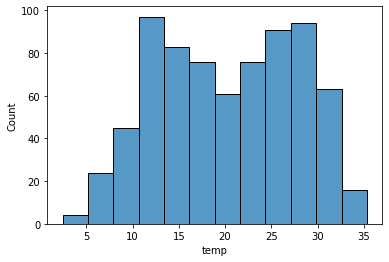

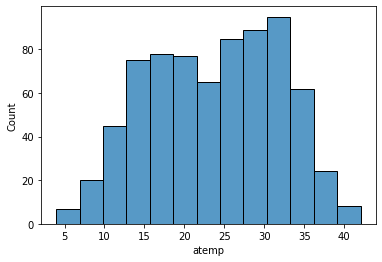

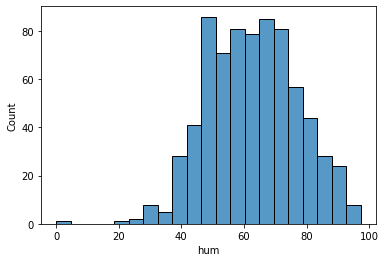

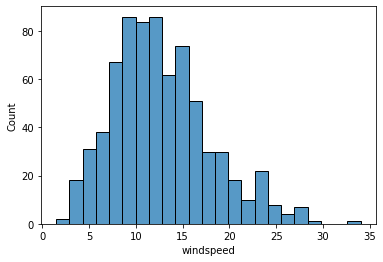

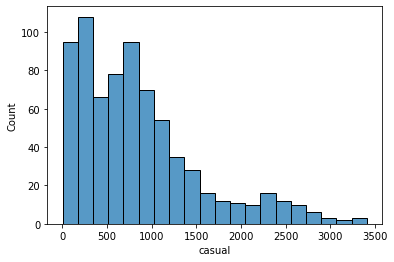

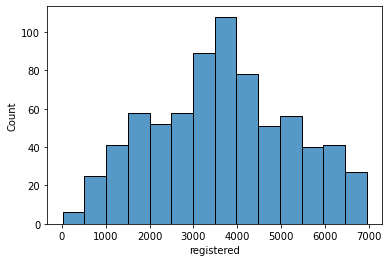

In [10]:
# histogram plots for continuous variables
for i in cont_cols:
    sns.histplot(data[i])
    plt.show()

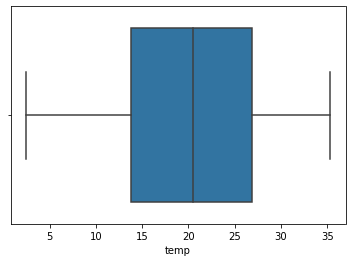

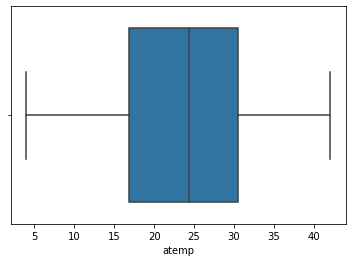

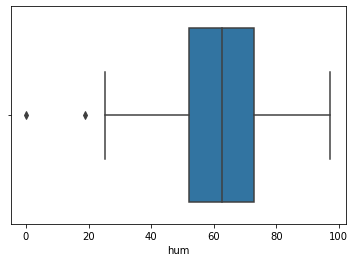

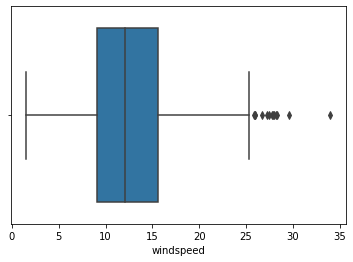

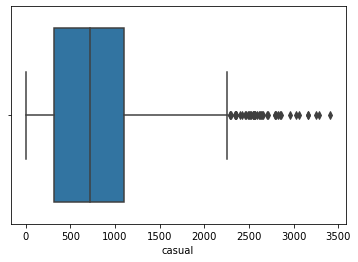

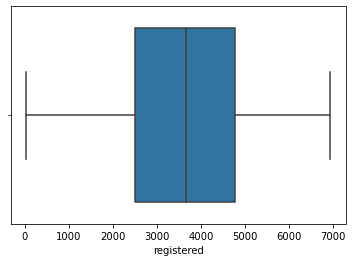

In [11]:
# box plots for continuous variables
for i in cont_cols:
    sns.boxplot(data[i])
    plt.show()

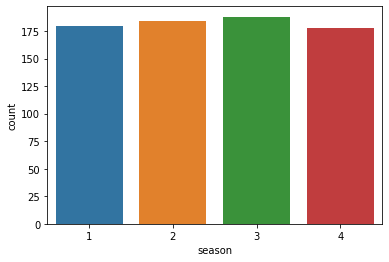

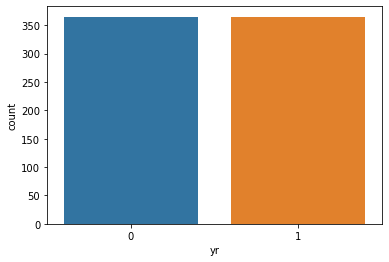

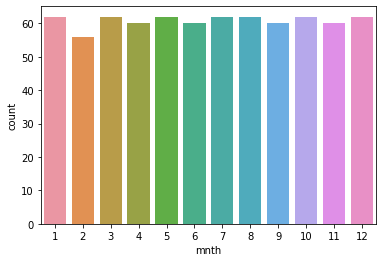

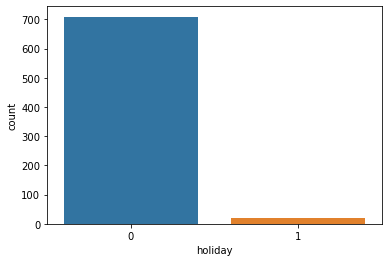

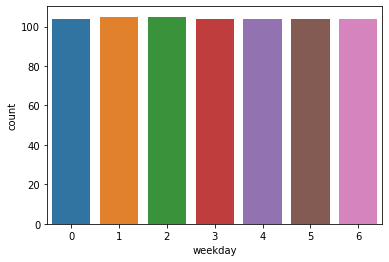

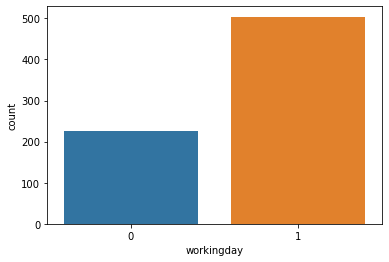

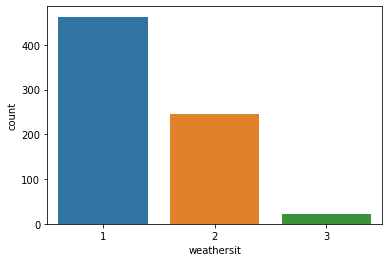

In [12]:
# count plots for categorical variables
for i in cat_cols:
    sns.countplot(data[i])
    plt.show()

## Bivariate Analysis

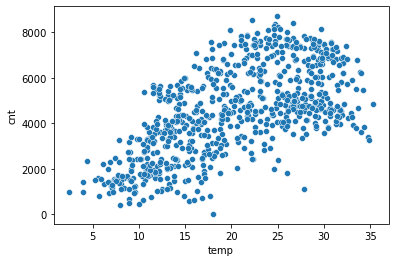

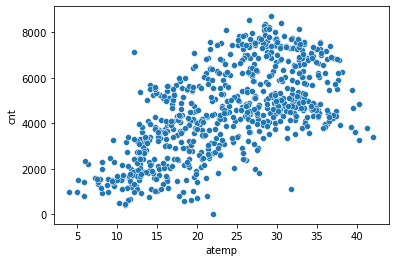

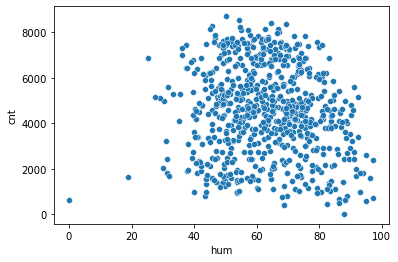

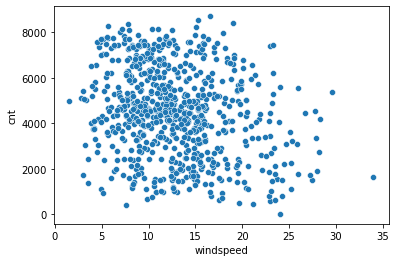

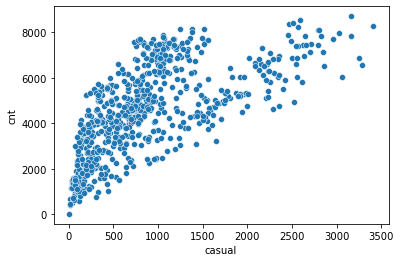

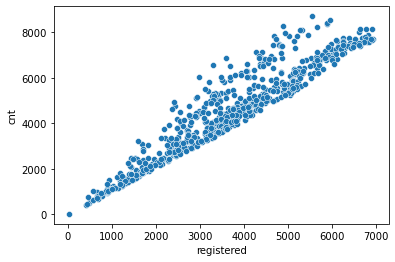

In [13]:
# scatter plot for continuous with target variable
for i in cont_cols:
    sns.scatterplot(data[i],data["cnt"])
    plt.show()

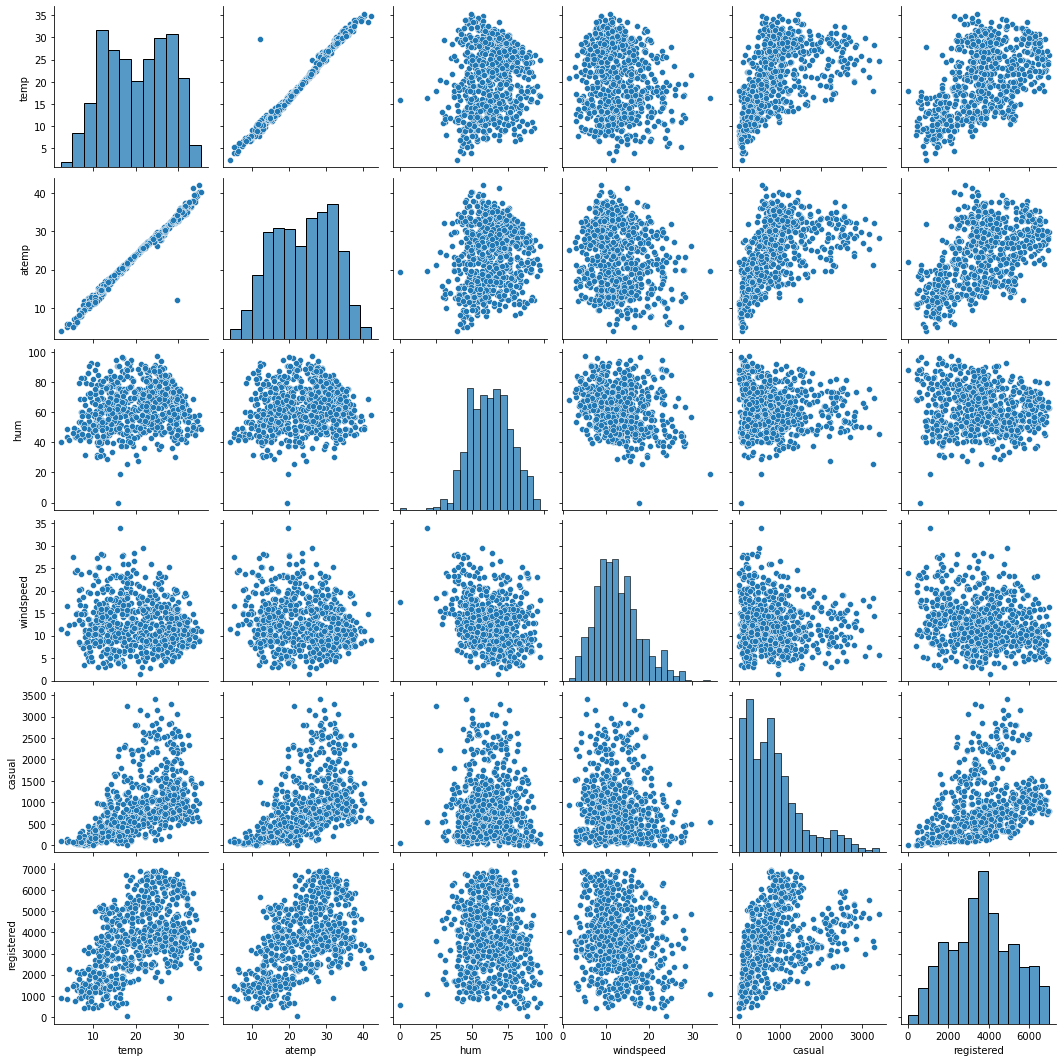

In [14]:
# pair plot for continuous variables
sns.pairplot(data[cont_cols])

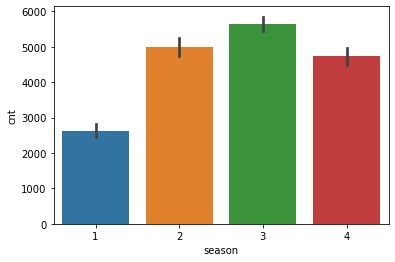

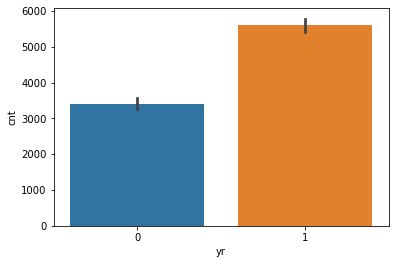

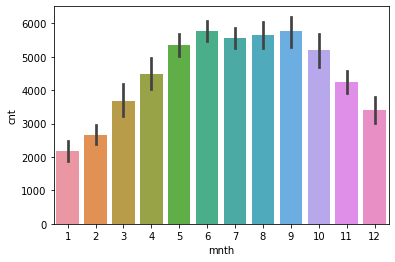

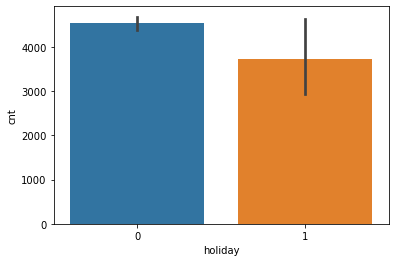

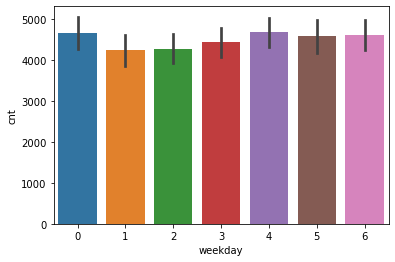

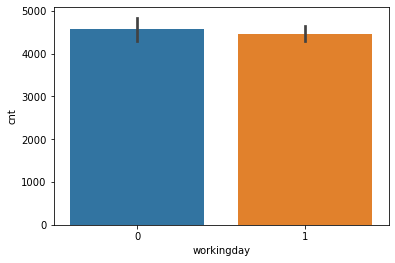

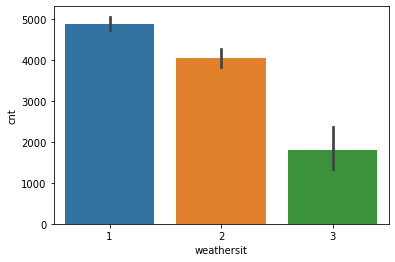

In [15]:
# scatter plot for continuous with target variable
for i in cat_cols:
    sns.barplot(data[i],data["cnt"])
    plt.show()

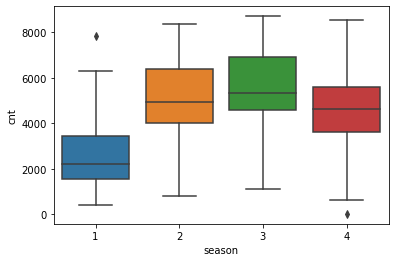

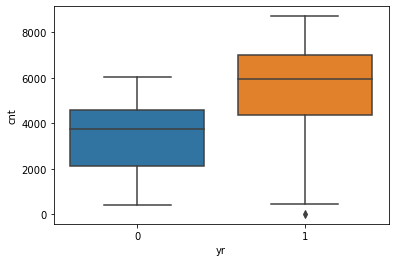

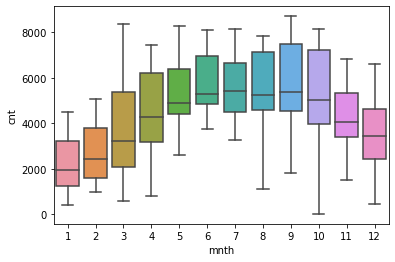

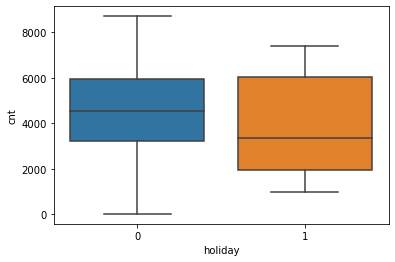

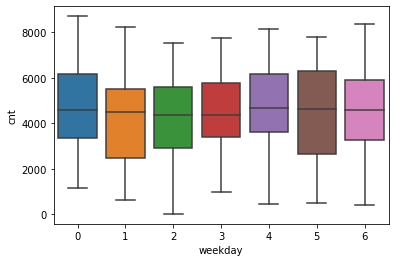

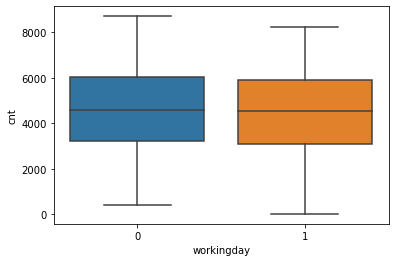

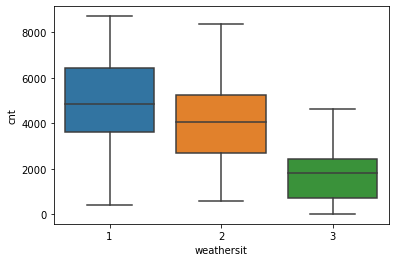

In [16]:
# box plot for categorical with target variable
for i in cat_cols:
    sns.boxplot(data[i],data["cnt"])
    plt.show()

## Heat Map

<AxesSubplot:>

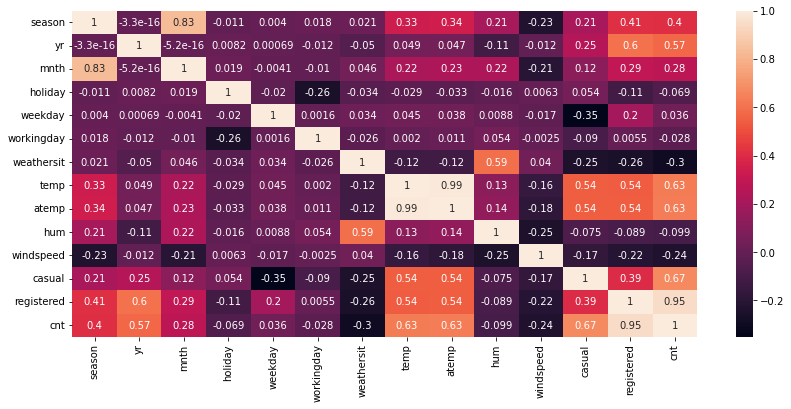

In [17]:
# correlation between the variables
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

In [18]:
# dropping one of the highly correlated variables 'atemp'.Also, dropping 'registered' and 'casual'
data=data.drop(['atemp','registered','casual'],axis=1)

## Dummy Variable Creation

In [19]:
data[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [20]:
# Converting integer to string data type for the categorical variables with more than 2 levels
data['season']=data['season'].astype(str)
data['mnth']=data['mnth'].astype(str)
data['weekday']=data['weekday'].astype(str)
data['weathersit']=data['weathersit'].astype(str)

In [21]:
# Checking datatypes after conversion
data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [22]:
# replacing the categorical attributes with more than 2 levels with actual names
data['season']=data.season.replace(('1','2','3','4'),('Spring','Summer','Fall','Winter'))
data['mnth']=data.mnth.replace(('1','2','3','4','5','6','7','8','9','10','11','12'),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
data['weekday']=data.weekday.replace(('0','1','2','3','4','5','6'),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'))
data['weathersit']=data.weathersit.replace(('1','2','3'),('weathersit_good','weathersit_moderate','weathersit_bad'))

In [23]:
# Creating dummy variables for categorival variables with more than 2 levels
dum=pd.get_dummies(data[["season","mnth","weekday"]],drop_first=True)
dum_1=pd.get_dummies(data["weathersit"],drop_first=True)

In [24]:
# Concatenating it with the original data set
df=pd.concat([data,dum,dum_1],axis=1)

In [25]:
df=df.drop(["season","mnth","weekday","weathersit"],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_Spring        730 non-null    uint8  
 8   season_Summer        730 non-null    uint8  
 9   season_Winter        730 non-null    uint8  
 10  mnth_Aug             730 non-null    uint8  
 11  mnth_Dec             730 non-null    uint8  
 12  mnth_Feb             730 non-null    uint8  
 13  mnth_Jan             730 non-null    uint8  
 14  mnth_Jul             730 non-null    uint8  
 15  mnth_Jun             730 non-null    uin

## Data Preparation 

### Train test Split

In [27]:
# Splitting dataset into training and testing sets in 70:30 ratio
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# Scaling numerical variables using minmax scaler except dummy variables and variables with 0 and 1
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
# Creating dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

In [31]:
# Selecting top 10 variables using RFE technique
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', False, 2),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 15),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'mnth_Jul', 'mnth_Sep', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building Model

### Model 1

In [35]:
X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.44e-186
Time:                        19:01:27   Log-Likelihood:                 492.94
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     499   BIC:                            -917.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1431    

In [36]:
# Dropping constant
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [37]:
# Checking VIFs for the remaining variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.24
2,temp,13.50
8,weathersit_good,11.27
9,weathersit_moderate,7.88
4,windspeed,4.22
0,yr,2.07
5,season_Spring,2.07
6,mnth_Jul,1.40
7,mnth_Sep,1.20
1,holiday,1.04


### Model 2

In [38]:
# Dropping 'hum' which has high value of VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.40e-185
Time:                        19:01:28   Log-Likelihood:                 487.41
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     500   BIC:                            -912.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0303    

In [39]:
# Again checking VIF for the remaining variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.85
7,weathersit_good,9.18
8,weathersit_moderate,5.06
3,windspeed,4.19
0,yr,2.07
4,season_Spring,2.01
5,mnth_Jul,1.37
6,mnth_Sep,1.20
1,holiday,1.04


### Model 3

In [40]:
# Dropping 'weathersit_moderate' 
X_train_new = X_train_new.drop(["weathersit_moderate"], axis = 1)
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     263.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.19e-174
Time:                        19:01:29   Log-Likelihood:                 458.92
No. Observations:                 510   AIC:                            -899.8
Df Residuals:                     501   BIC:                            -861.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2088      0.020     

In [41]:
# Againg checking VIFs for remaining variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.28
3,windspeed,3.74
7,weathersit_good,2.66
0,yr,2.03
4,season_Spring,1.56
5,mnth_Jul,1.31
6,mnth_Sep,1.20
1,holiday,1.04


### Model 4

In [42]:
# Dropping 'mnth_Sep' 
X_train_new = X_train_new.drop(["mnth_Sep"], axis = 1)
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     294.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.43e-173
Time:                        19:01:30   Log-Likelihood:                 454.23
No. Observations:                 510   AIC:                            -892.5
Df Residuals:                     502   BIC:                            -858.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2084      0.020     

In [43]:
# Again checking VIFs for remaining variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.77
3,windspeed,3.70
6,weathersit_good,2.65
0,yr,2.03
4,season_Spring,1.56
5,mnth_Jul,1.26
1,holiday,1.03


## Residual Analysis of the training dataset

In [44]:
y_train_price = lm.predict(X_train_lm)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

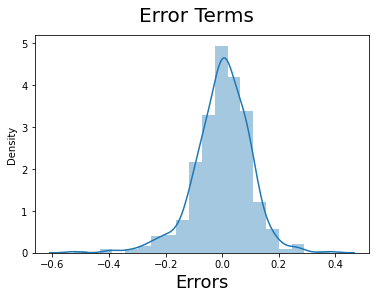

In [46]:
# Plotting graph for error terms to check normal distribution
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

## Making Prediction

In [47]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
X_test_new = X_test[X_train_new.columns]
 
X_test_new = sm.add_constant(X_test_new)

In [50]:
y_pred = lm.predict(X_test_new)

## Model Evaluation 

Text(0, 0.5, 'y_pred')

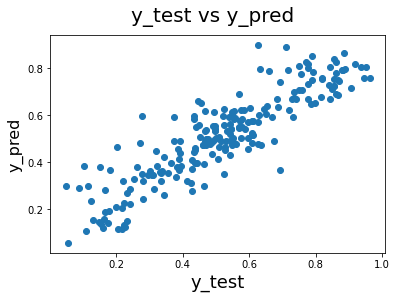

In [51]:
# Plotting y_test Vs y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [52]:
# Cheking R score for the test dataset 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7874840490540395